In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import os

os.chdir("C:/Users/SEBASTIAN/Desktop/Subir a Github/Linear_Regression/") #Establecer directorio de trabajo

In [3]:
df= pd.read_csv("california_housing.csv", sep=",")
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [4]:
def graficar_correlacion(df): #Funcion para seleccionar las variables numericas y graficar su correlacion
    num_cols= df.select_dtypes(include=["int64", "float64"]).columns #Seleccionar las variables numericas
    df_num= df[num_cols] #Crear un dataframe solo con las variables numericas
    plt.figure(figsize= (12,8))
    sns.heatmap(df_num.corr(), annot= True, cmap= "coolwarm") #Graficar su correlacion
    plt.title("Mapa de calor de correlaciones \n")

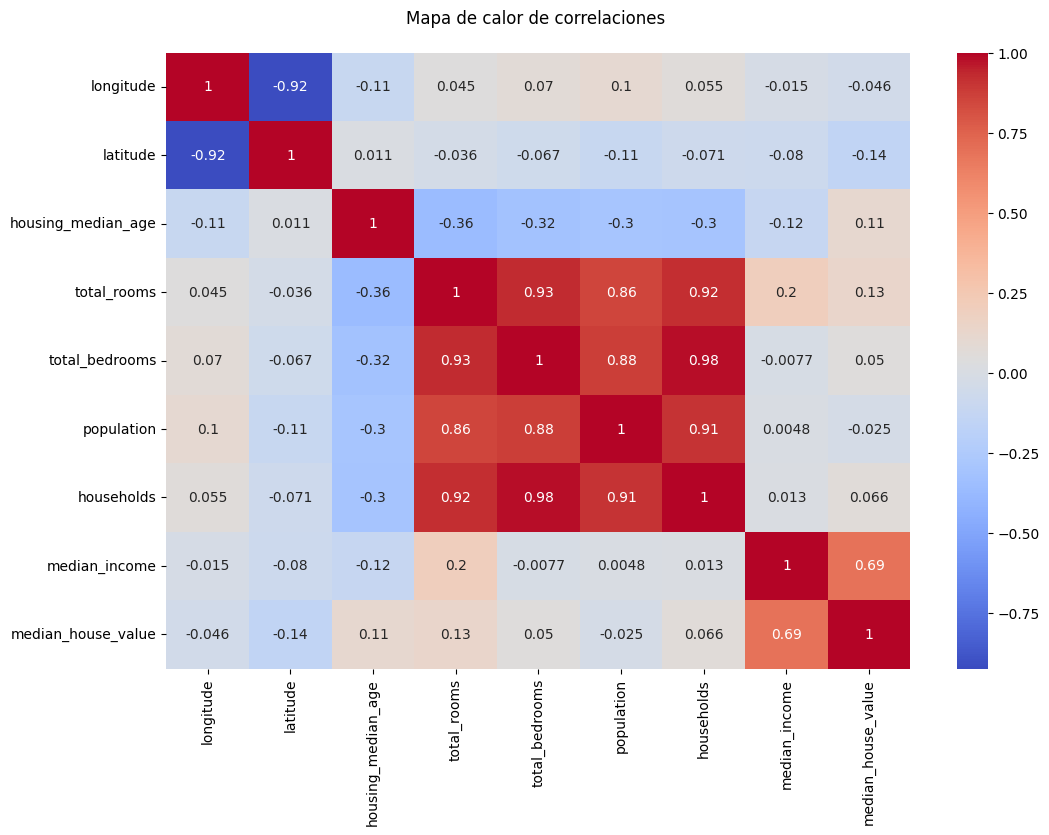

In [5]:
graficar_correlacion(df)

<Axes: xlabel='total_rooms', ylabel='population'>

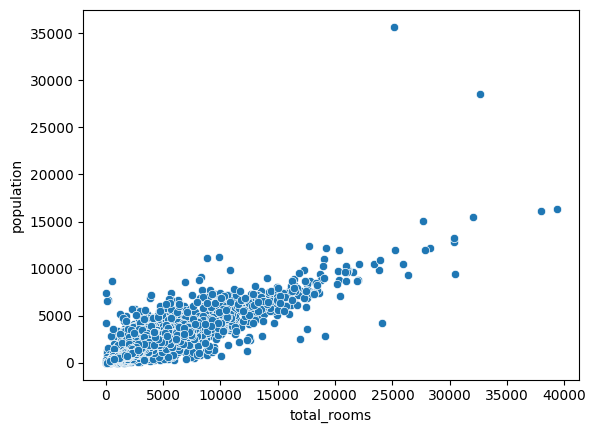

In [6]:
sns.scatterplot(x= df["total_rooms"], y=df["population"], data= df) #Grafica de puntos entre las variables

In [7]:
#Representar los datos como un array de numpy como una matriz 2D de una sola columna
x= df["total_rooms"].values.reshape(-1,1)
y= df["population"].values.reshape(-1,1) 

#Estandarizar los datos
ss_x= StandardScaler()
ss_y= StandardScaler()

#Aplicar la transformacion de la estandarizacion
x_stand= ss_x.fit_transform(x)
y_stand= ss_y.fit_transform(y)

#Crear el modelo
lm= LinearRegression()
lm.fit(x_stand, y_stand)

LinearRegression()

Text(0, 0.5, 'Poblacion \n')

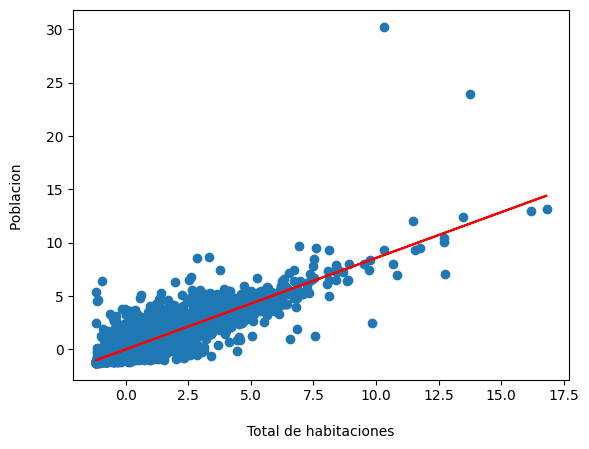

In [8]:
plt.scatter(x_stand, y_stand)
plt.plot(x_stand, lm.predict(x_stand), color= "red") #Graficar las predicciones de los valores de y
plt.xlabel("\nTotal de habitaciones")
plt.ylabel("Poblacion \n")

In [9]:
#Hacer predicciones

rooms= 880
num_rooms_stand= ss_x.transform(np.array(rooms).reshape(-1,1)) #Estandarizar 

prediccion_stand= lm.predict(num_rooms_stand) #Hace la prediccion pero estandarizada, es necesario volver el valor real
prediccion_sin_stand= ss_y.inverse_transform(prediccion_stand) #Revertir la estandarizacion 

print(f"El numero de personas viviendo dentro de un bloque (grupo de casas) de {rooms} habitaciones en California es {round(prediccion_sin_stand[0][0],0)}")

El numero de personas viviendo dentro de un bloque (grupo de casas) de 880 habitaciones en California es 644.0


In [14]:
import sklearn.metrics

perfomance= lm.score(x_stand, y_stand)
 
print(round(perfomance, 3))

0.735
